# Numerische Methoden für Differentialgleichungen
## Aufgabenblatt 1
*gelöst von Stollmayer Max*

### Aufgabe 1
_Umschreiben eines Anfangswertproblems in ein System 1. Ordnung_

Das folgende System 2. Ordnung

\begin{cases}
    \ddot{y}_1 = t^2 - \dot{y}_1 - y_2^2 \\
    \ddot{y}_2 = t + \dot{y}_2 + y_1^3 \\
    y_1(0)=0, \dot{y}_1(0)=1, y_2(0)=1, \dot{y}_2(0)=0
\end{cases}

lässt sich in ein System 1. Ordnung umschreiben, durch das Einführen der neuen Variablen $y_3$ und $y_4$. Für die gilt nämlich $\ddot{y}_1 = \dot{y}_3$ bzw. $\ddot{y}_2 = \dot{y}_4$. Das umgeschriebene System ist:

\begin{cases}
    \dot{y}_1 = y_3 \\
    \dot{y}_2 = y_4 \\
    \dot{y}_3 = t^2 - y_3 - y_2^2 \\
    \dot{y}_4 = t + y_4 + y_1^3 \\
    y_1(0)=0, y_2(0)=1, y_3(0)=1, y_4(0)=0
\end{cases}

D.h. Systeme höherer Ordnung lassen sich immer zu einem höher dimensionalen System 1. Ordnung umschreiben. Das erlaubt uns nun Verfahren für diese zu entwickeln, wie das explizite Euler-Verfahren im folgenden Teil.

### Aufgabe 2

_Implementierung des expliziten Euler-Verfahrens (Vorwärts-Euler) für ODE Systeme 1. Ordnung_

#### Konstruktion

Wir betrachten das Cauchy-Problem
$\begin{cases} y'(t) = f(t,\, y(t)) \\ y(t_0) = y_0 \end{cases}$
für $f$ gleichmäßig Lipschitz-stetig auf $\mathbb{R}$ bzgl. $y$.

Durch Taylorentwicklung von $y$ bei $t$ erhalten wir $$y(t+h) = y(t) + h \ y'(t) + \frac{h^2 \ y''(\xi_h)}{2}$$ für eine Gitterkonstante $h>0$ und ein $\xi_h \in [t,\, t+h]$. Substituieren wir nun $y'(t_n) = f(t_n,\, y(t_n))$ und verlieren das Restglied, dann ergibt sich ein Schritt vom expliziten Euler-Verfahren: $y(t+h) \simeq y(t) + h \ f(t,\, y(t))$. Diesen Schritt können wir nun auf die Punkte $t_n = t_0 + n\ h$ einer äquidistanten Zerlegung eines Intervalls $[a = t_0, t_N=b]$ anwenden und bekommen so das rekursive Verfahren $y_{n+1} = y_n + h \ f(t_n,\, y_n)$ mit $y_n \simeq y(t_n)$.

#### Konvergenz

Der lokale Abschneidefehler ist die Differenz zwischen der exakten Lösung und dem Resultat aus einem Schritt, der sich an einem Punkt $t_{n+1}$ ergibt, was genau durch das Restglied der Taylorentwicklung gegeben ist: $$\tau_{n+1} := y(t_n+h) - \big( y(t_n) + h \ f(t_n,\, y(t_n)) \big) = \frac{h^2 \ y''(\xi_h)}{2}$$

Der globale Abschneidefehler besteht nun aus der Differenz zwischen der exakten Lösung und dem Resultat aus dem gesamten Verfahren von $0$ an, was wir in den lokalen Abschneidefehler und der Fehlerakkumulation teilen können:
$$e_{n+1} := y(t_{n+1}) - y_{n+1} = (y(t_{n+1}) - y^*_{n+1}) ) + ( y^*_{n+1} - y_{n+1} ) = \tau_{n+1} + ( y^*_{n+1} - y_{n+1} ),$$
wobei $y^*_{n+1} = y(t_n) + h \ f(t_n,\, y(t_n))$ das Ergebnis nach einem Schritt bei genauem Anfangswert $y(t_n)$ ist.
Die Fehlerakkumulation lässt sich über die Lipschitzkonstante $L$ von $f$ abschätzen:
$$y^*_{n+1} - y_{n+1} = e_n + h \ \big( f(t_n,\, y(t_n)) - f(t_n,\, y_n) \big) \le e_n + h \ L \ |y(t_n) - y_n| \le (1+h\ L)\ |e_n|$$
Und damit der globale Abschneidefehler:
\begin{align*}
    |e_{n+1}| &\le \tau_{n+1} + (1+h\ L)\ |e_n| \\
    &\le \tau_{n+1} + (1+h\ L)\ (\tau_n + (1+h\ L)\ |e_{n-1}|) \\
    &\le \dots \\
    &\le \sum_{k=0}^n (1+h\ L)^k \ \tau_{n+1-k} \\
    &\le \max_k|\tau_k| \ \frac{(1 + h\ L)^{n+1} - 1}{h\ L} \\
    &= \frac{h^2\ \max_{\xi}|y''(\xi)|}{2}\ \frac{(1 + h\ L)^{n+1} - 1}{h\ L} \\
    &= M\ h\ \frac{(1 + h\ L)^{n+1} - 1}{2L}
\end{align*}
Mit $M = \max_{\xi}|y''(\xi)|$ konvergiert also $e_{n+1}$ gegen $0$ für $h\rightarrow 0$.
Da der globale Fehler proportional zu $h^1$ ist, hat das explizite Euler-Verfahren Konvergenzordnung $1$.

#### Implementierung

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11.2, 6.3))
plt.rc("font", size=12)
plt.rc("axes", edgecolor="white")
plt.rc("legend", frameon=True, framealpha= 0.8, facecolor="white", edgecolor="white")

In [2]:
def forwardEuler(f, y0, t):
    '''
    Returns array of function values approximated with the forward Euler method.

    f .... function of ODE y'(t) = f(t, y)
    y0 ... initial value y(t0) = y0
    t .... discretized interval [t0, t1, ...]
    '''

    N = len(t)
    dim = (N,) + np.shape(y0)
    
    y = np.zeros(dim)
    y[0] = y0

    for n in range(N-1):
        h = t[n+1] - t[n]
        y[n+1] = y[n] + h * f(t[n], y[n])

    return y

#### Test 1
Quantitative Probe vom expliziten Euler-Verfahren anhand einem Vergleich mit der exakten Lösung von dem Cauchy-Problem $\begin{cases} y'(t) = y(t) \\ y(1) = 1 \end{cases}$.

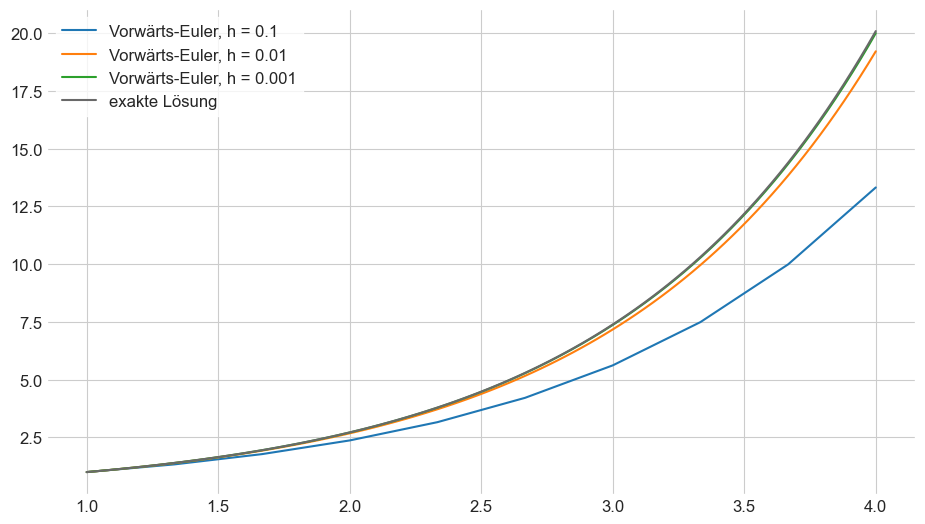

In [3]:
def f(t, y):
    return y

def exact(t):
    return np.exp(t-1)

y0 = 1
t1 = np.linspace(1, 4, 10)
t2 = np.linspace(1, 4, 100)
t3 = np.linspace(1, 4, 1000)

y1 = forwardEuler(f, y0, t1)
y2 = forwardEuler(f, y0, t2)
y3 = forwardEuler(f, y0, t3)

plt.plot(t1, y1, label="Vorwärts-Euler, h = 0.1")
plt.plot(t2, y2, label="Vorwärts-Euler, h = 0.01")
plt.plot(t3, y3, label="Vorwärts-Euler, h = 0.001")
plt.plot(t2, exact(t2), color="dimgrey", label="exakte Lösung")
plt.legend()
plt.show()

In [4]:
def error(exact, vals, t):
    '''Maxmimum norm'''
    return max(np.abs(exact(t) - vals).flatten())

def order(exact, vals1, vals2, t1, t2):
    '''Approximation of order of convergence'''
    a = error(exact, vals2, t2) / error(exact, vals1, t1)
    b = (t2[-1] - t2[0]) * len(t1) / (t1[-1] - t1[0]) / len(t2)
    return np.log(a) / np.log(b)

In [5]:
print(f"Fehler für Schrittweite 0.1:  {error(exact, y1, t1):.2f}")
print(f"Fehler für Schrittweite 0.01: {error(exact, y2, t2):.2f}")
print(f"Fehler für Schrittweite 0.001: {error(exact, y3, t3):.2f}")

print(f"Approximierte Konvergenzordnung: {order(exact, y2, y3, t2 ,t3):.2f}")

Fehler für Schrittweite 0.1:  6.77
Fehler für Schrittweite 0.01: 0.88
Fehler für Schrittweite 0.001: 0.09
Approximierte Konvergenzordnung: 0.99


Man sieht, dass das Verfahren gegen die exakte Lösung strebt, wenn man die Schrittweite verkleinert. Wie in der analytische Betrachtung kommt man auch mit der Berechnung zum Schluss, dass die Konvergenz mit Ordnung 1 geschieht.

#### Test 2
Qualitative Probe vom exakten Euler-Verfahren anhand von einem Lotka-Volterra-System

\begin{cases}
    y_1'(t) = -(\alpha-\beta\ y_2(t))\ y1(t) \\
    y_2'(t) = (\gamma - \delta\ y_1(t))\ y_2(t) \\
    y_1(0) = 3,\ y_2(0) = 5
\end{cases}

für $\alpha = 1, \beta = 0.1, \gamma = 4$ und $\delta = 1$, wobei $y_1$ die Zahl der Räuber und $y_2$ die Zahl der Beutetiere zur Zeit $t$ beschreibt.

In [6]:
def f(t, y):
    y1, y2 = y
    return np.array([-(1 - 0.1 * y2) * y1, (4 - 1 * y1) * y2])

y0 = (3, 5)

Anzahl der Tiere zum Zeitpunkt 10:
-1.77e+57 Räuber
 1.77e+58 Beutetiere


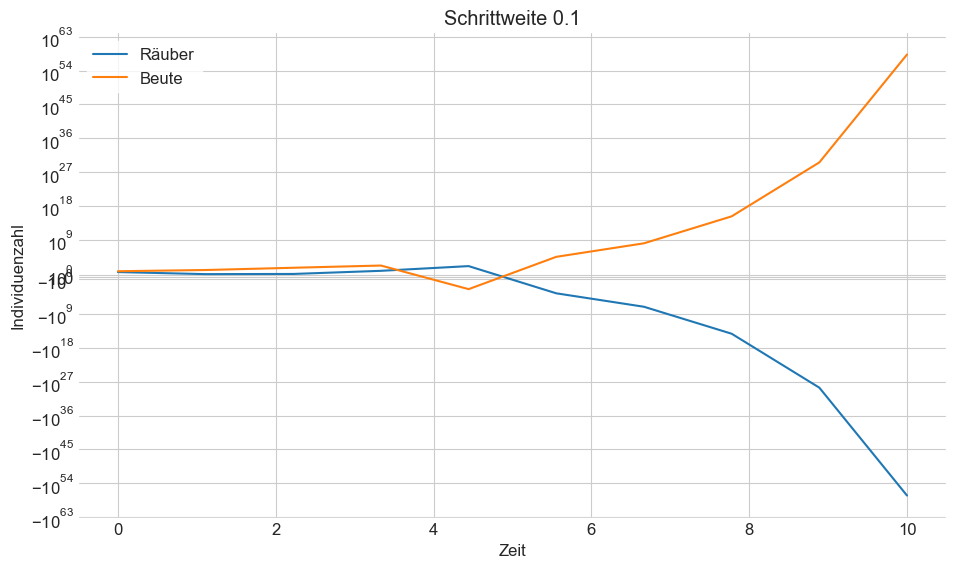

In [7]:
t = np.linspace(0, 10, 10)
y = forwardEuler(f, y0, t)

print("Anzahl der Tiere zum Zeitpunkt 10:")
print(f"{y[-1, 0]:9.2e} Räuber")
print(f"{y[-1, -1]:9.2e} Beutetiere")

plt.plot(t, y[:, 0], label="Räuber")
plt.plot(t, y[:, 1], label="Beute")
plt.yscale("symlog")
plt.xlabel("Zeit")
plt.ylabel("Individuenzahl")
plt.title("Schrittweite 0.1")
plt.legend()
plt.show()

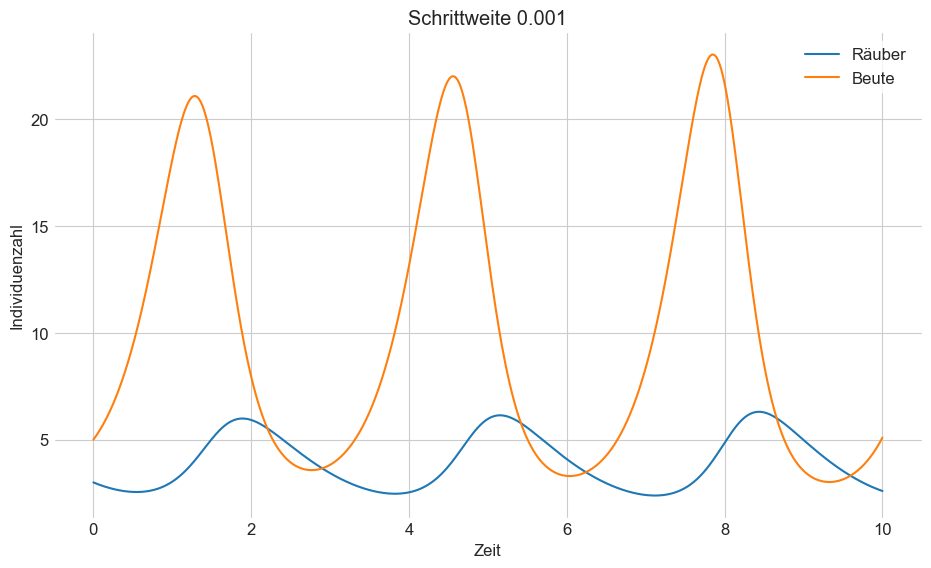

In [8]:
t = np.linspace(0, 10, 1000)
y = forwardEuler(f, y0, t)

plt.plot(t, y[:, 0], label="Räuber")
plt.plot(t, y[:, 1], label="Beute")
plt.xlabel("Zeit")
plt.ylabel("Individuenzahl")
plt.title("Schrittweite 0.001")
plt.legend()
plt.show()

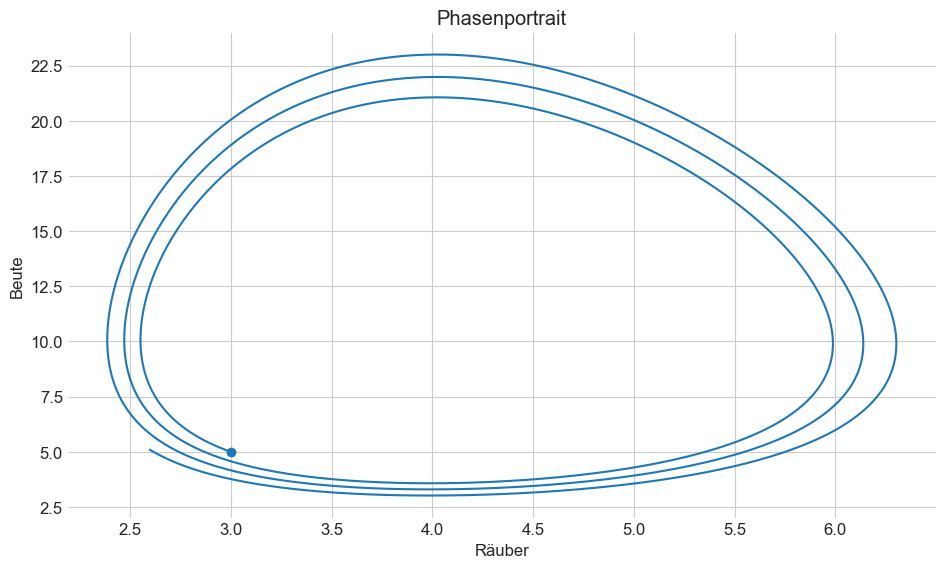

In [9]:
plt.plot(y[:, 0], y[:, 1])
plt.plot(*y0, "o", color="C0")
plt.title("Phasenportrait")
plt.xlabel("Räuber")
plt.ylabel("Beute")
plt.show()

Bei einer Schrittweite von $0.1$ scheitert das explizite Euler-Verfahren, die korrekte Populationsdynamik des Räuber-Beute-Systems einzufangen und zeigt ein divergentes Verhalten auf. Zum Zeitpunkt 10 etwa progonstiziert das Verfahren ca. $-10^{57}$ Räuber und $10^{58}$ Beutetiere, was keine zu erwartenden Zahlen sind.

Bei einer Schrittweite von $0.001$ schafft das Verfahren die richtige Dynamik festzuhalten. Jedoch ist auch hier das periodische Verhalten nicht exakt getroffen, denn die "Peaks" der Populationen steigen mit jeder Periode, sollten aber eigentlich konstant bleiben. Im Phasenportrait sieht man, wie sich die Kurve nicht schließt, sondern nach außen wandert.

#### Fazit

Das explizite Euler-Verfahren ist leicht implementiert, benötigt wenig Rechenaufwand und liefert für einfache Problem schnell gute Näherungen. Doch um das Verhalten komplexerer System zu erfassen, muss man entweder die Schrittweiten sehr stark verkleinern, was den Rechenaufwand erhöht, oder zu einem geeigneteren Verfahren greifen.